## Group no. 5 : Nitish goyal 18510053 Rachana choudhary 18510063

## PH509 Lab 6 

This is a take home lab session.

### Kepler's laws of planetary motion

In this lab, we will study the motion of a planet under the gravitational force of the Sun (assumed to be stationary). Later, we will relax the condition that the Sun is stationary. You will set up the equations in 2D. Argue that for a central force, the angular momentum $\frac{d\vec L}{dt} = \frac{d}{dt}\, (\vec r \times \vec p ) = 0$, and hence it is perfectly fine to work this problem out in 2D (the planet's motion is confined to a plane). 

Assume the planet's orbit to be very close to circular. As shown in class, (Giordano Eq 4.5), for such a case, working in units where time is measured in `Yr` and distance in `AU`, the value of $G M_S = 4 \pi^2 \; \text{AU}^3 / \text{Yr}^2$. 

The equation of motion for the planet (stationary Sun at origin) are:
\begin{eqnarray}
\frac{d v_x}{dt} &=& - G M_s \frac{x}{r^3} \\
\frac{d x}{dt} &=& v_x \\
\frac{d v_y}{dt} &=& - G M_s \frac{y}{r^3} \\
\frac{d x}{dt} &=& v_y \\
\end{eqnarray}

Study the Plot 4.2 and reproduce it (choose initial velocity is $2\pi \; \text{AU/Yr}$) for a planet kept initially at $1\; \text{AU}$. 

Calculate the total energy and angular momentum at each step and verify that they are conserved. 

Investigate the motion of the planet for higher and lower initial velocities than $2\pi$. 

__Halley's Comet__: Use your program to investigate the motion of the Halley's comet, which has a period of $76 \, \text{Yr}$ and distance of closest approach to be $0.59 \; \text{AU}$. How would you fold in a root-finding algorithm to find the right initial velocity for this comet? Once you get the initial velocity right, find the farthest distance that the comet travels from the Sun (compare it with Pluto's distance which is about $30 \; \text{AU}$.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math


In [31]:
G=6.67*10**(-11)
Ms=1.989*10**30
AU= 1.496 *10**11
YR=86400*365.35
me=3*10**-6

In [32]:
alpha=G*Ms*(YR**2)/(AU**3)
value=4*(np.pi)**2


In [33]:
print(alpha)
print (value)       # Which comes out to be equal to 4*pi**2

39.483127363058195
39.47841760435743


In [5]:
def rhs1(Ik):
    xk,vxk,yk,vyk=Ik
    return vxk, -4*np.pi**2*xk/(xk**2+yk**2)**(3/2), vyk, -4*np.pi**2*yk/(xk**2+yk**2)**(3/2)

In [7]:
def leapfrog(rhs, I0, T0, dt):

    N = int((T0[1]-T0[0])/dt) + 1
    x = np.zeros(N)
    y = np.zeros(N)                          # We need not extract velocity out
    vxhalf = np.zeros(N)
    vyhalf = np.zeros(N) 
    vx=np.zeros(N)
    vy=np.zeros(N)
    x[0], vx[0], y[0], vy[0]= I0
    
    for k in range(N-1): 
        
        dydt = rhs([x[k], vx[k], y[k], vy[k]])
        
        axk = dydt[1]
        
        ayk = dydt[3]
        
        vxhalf[k] = vx[k] + .5 * dt * axk
        
        vyhalf[k] = vy[k] + .5 * dt * ayk
        
        x[k+1] = x[k] + dt * vxhalf[k]
        
        y[k+1] = y[k] + dt * vyhalf[k]
        
        dydt = rhs([x[k+1], vxhalf[k], y[k+1], vyhalf[k]])
        
        akxplus1 = dydt[1]
        
        akyplus1 = dydt[3]
        
        vx[k+1] = vxhalf[k] + 0.5*dt*akxplus1
        
        vy[k+1] = vyhalf[k] + 0.5*dt*akyplus1
        
        
    return x[::20], vx[::20], y[::20], vy[::20], np.linspace(T0[0],T0[1],  int((T0[1]-T0[0])/dt) + 1)[::20]


In [8]:
I0 = [1, 0, 0, 2*np.pi]
T0 = [0,1]
dt = 1/10000
sol1=leapfrog(rhs1, I0, T0, dt)

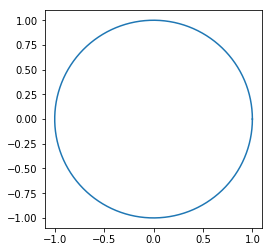

In [9]:
plt.plot(sol1[0], sol1[2])
plt.axis('scaled')
plt.savefig('see', dp1=1200)


In [10]:
print(np.average(sol1[1]**2+sol1[3]**2)**.5)

6.283184688291967


 Which is almost equal to earth's velocity which is 6.44 AU/YR

In [65]:
I0 = [1, 0, 0, np.pi]
T0 = [0,1/2]
dt = 1/10000
sol2=leapfrog(rhs1, I0, T0, dt)      # for initial velocity being pi

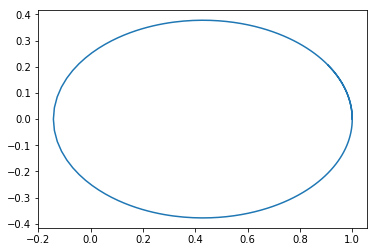

In [66]:
plt.plot(sol2[0], sol2[2])
plt.axis('scaled')
plt.savefig('see')

In [83]:
I0 = [1, 0, 0, 3*np.pi]
T0 = [0,1]
dt = 1/10000
sol3=leapfrog(rhs1, I0, T0, dt)

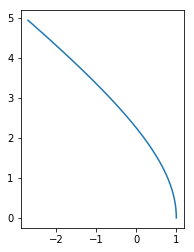

In [102]:
plt.plot(sol3[0], sol3[2])
plt.axis('scaled')
plt.show()

In [82]:
print(np.average(KE))
print(np.average(PE))
print(np.average(KE+PE))

5.921761474077993e-05
-0.00011843524114731535
-5.921762640653542e-05


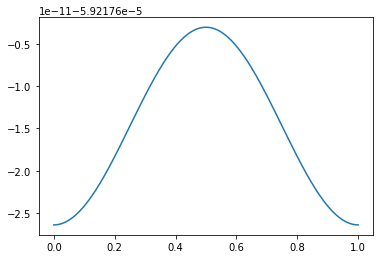

In [35]:
plt.plot(sol1[4],KE+PE)
plt.show()

## Runge-Lenz vector


In [48]:
def My_Levi_Civita(i, j, k):
    
    return (np.sign(j-i) * np.sign(k-i) * np.sign(k-j))
    
    

In [49]:
def crossprod_Levi(A, B):
    
    cp = np.zeros((3, 1))
    s = np.zeros((3, 1))
    for i in range(3): # Calculate s_i = \sum_jk {epsilon_ijk A_j B_k}
        for j in range(3):
            for k in range(3):
                
                epsilon = My_Levi_Civita(i , j, k)
                #print sign
                sol = epsilon * A[j] * B[k]  
                s[i] = s[i] + sol
        cp[i] = s[i]
        
    return cp

    

In [52]:
def l_cal(sol1):
    lvector=[]
    for i in range(len(sol1[0])):
        A=[sol1[0][i],sol1[2][i],0]
        B=[sol1[1][i]*me,sol1[3][i]*me,0]
        l=crossprod_Levi(A, B)
        lvector.append(l)
    return lvector


In [59]:

lvector=l_cal(sol1)
print(lvector[0],'\n',lvector[-1])   # Which is evidently constant



[[0.00000000e+00]
 [0.00000000e+00]
 [1.88495559e-05]] 
 [[0.00000000e+00]
 [0.00000000e+00]
 [1.88495559e-05]]


In [ ]:
# If E=0, one can say the body has just escaped through the potential

In [96]:
def bisectRoot(func, a, b, eps, maxIter):
    
    x1=a
    x2=b
    i=0
    if func(x1)>0:
        temp=x2
        x2=x1
        x1=temp
    while func(x1)!=0 and i<maxIter:
        i=i+1
        x3=(x1+x2)/2
        
        if func(x3)>0:
            x2=x3
        elif func(x3)<0: 
            x1=x3
        else:
            return x3
        
    return (x3,i)
        

In [146]:
# Total Energy will be greater than or equal to zero for escape

def Efinder1(x):
    I0 = [1, 0, 0, x]
    T0 = [0,1]
    dt = 1/10000
    sol1=leapfrog(rhs1, I0, T0, dt)
    KE=1/2*me*(sol1[1]**2+sol1[3]**2)
    PE=-4*np.pi**2*me/(sol1[0]**2+sol1[2]**2)**.5
    return np.average(KE+PE)

In [147]:
esc_vel=bisectRoot(Efinder1,6,9,.001,20)

In [ ]:
print(esc_vel[0])         # Escape velocity of earth came out to be 8.8857

In [149]:
I0 = [1, 0, 0, esc_vel[0]]
T0 = [0,100]
dt = 1/10000
sol5=leapfrog(rhs1, I0, T0, dt)

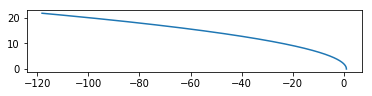

In [150]:
plt.plot(sol5[0], sol5[2])
plt.axis('scaled')
plt.show()

In [ ]:
# Clearly after even hundred years it hasn't been into closed orbit

In [154]:
def Efinder2(x):
    I0 = [1, 0, 0, x]
    T0 = [0,76]
    dt = 1/1000
    sol1=leapfrog(rhs1, I0, T0, dt)
    return sol1[0][-1]-.57

In [160]:
velohelo=bisectRoot(Efinder2,8,16,.001,4)

In [161]:
print(velohelo[0])   # It took me 2 min to get result for even 4 iterations

(11.875, 4)


In [162]:
# The above is appx value of v

In [181]:
I0 = [.57, 0, 0, 11.5]
T0 = [0,76]                          
dt = 1/10000
sol6=leapfrog(rhs1, I0, T0, dt)  # If i put 11.5 I get a closed trajec which means i have to find siln to more accuracy

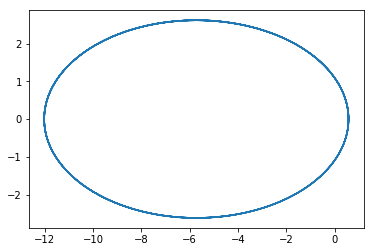

In [182]:
plt.plot(sol6[0],sol6[2])  

In [189]:
n=min(np.sqrt(sol6[1]**2+sol6[3]**2))
print(n)

0.5452806186928192


In [ ]:
# According to this plot v at farthest is .54 AU/YR